Modeling CNN

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# Load dataset from CSV
mfcc_data = pd.read_csv('Ekstraksi_MFCC.csv')

# Extract features and labels
X = mfcc_data.iloc[:, 1:-1].values  # Assuming MFCC features are in columns 1 to second last
y = mfcc_data.iloc[:, -1].values   # Assuming labels are in the last column

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# Reshape data to fit CNN input requirements (samples, height, width, channels)
# Here, height = 1, width = number of features, and channels = 1
X = X.reshape(X.shape[0], 1, X.shape[1], 1)

print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (8000, 1, 13, 1)


In [26]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

accuracy_per_fold = []
loss_per_fold = []

# Define a function to build the model
def build_model(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, kernel_size=(1, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(1, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
for train_index, test_index in kf.split(X):
    print(f"Training fold {fold_no}...")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Build the CNN model
    model_cnn = build_model((X_train.shape[1], X_train.shape[2], X_train.shape[3]), y_categorical.shape[1])

    # Train the CNN model
    history_cnn = model_cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the CNN model
    loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold_no} - Accuracy: {accuracy_cnn}")
    
    accuracy_per_fold.append(accuracy_cnn)
    loss_per_fold.append(loss_cnn)
    
    fold_no += 1

# Print accuracy for each fold
print("\nAccuracy for each fold:")
for i, accuracy in enumerate(accuracy_per_fold, 1):
    print(f"Fold {i}: Accuracy = {accuracy}")

# Print average accuracy
print(f"\nAverage Accuracy: {np.mean(accuracy_per_fold)}")

Training fold 1...
Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4342 - loss: 1.3006 - val_accuracy: 0.7306 - val_loss: 0.7062
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6800 - loss: 0.7642 - val_accuracy: 0.8031 - val_loss: 0.5159
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7346 - loss: 0.6213 - val_accuracy: 0.8481 - val_loss: 0.4486
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7609 - loss: 0.5783 - val_accuracy: 0.8625 - val_loss: 0.4035
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7853 - loss: 0.5357 - val_accuracy: 0.8600 - val_loss: 0.3860
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8055 - loss: 0.4916 - val_accuracy: 0.8863 - val_loss: 0.3549
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8243 - loss: 0.4589 - val_accuracy: 0.8900 - val_loss: 0.3305
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8263 - loss: 0.4634

In [28]:
# Print accuracy for each fold
print("\nAccuracy for each fold:")
for i, accuracy in enumerate(accuracy_per_fold, 1):
    print(f"Fold {i}: Accuracy = {accuracy}")

# Print average accuracy
print(f"\nAverage Accuracy: {np.mean(accuracy_per_fold)}")


Accuracy for each fold:
Fold 1: Accuracy = 0.9256250262260437
Fold 2: Accuracy = 0.9225000143051147
Fold 3: Accuracy = 0.9331250190734863
Fold 4: Accuracy = 0.9287499785423279
Fold 5: Accuracy = 0.9212499856948853

Average Accuracy: 0.9262500047683716


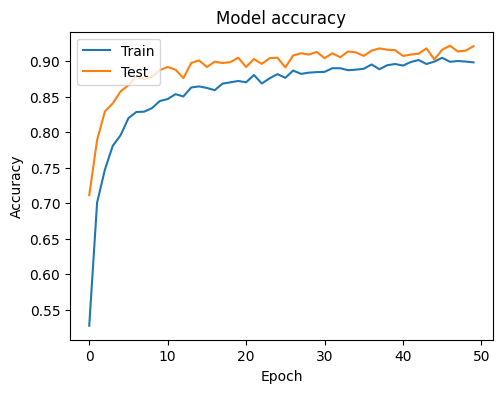

In [31]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

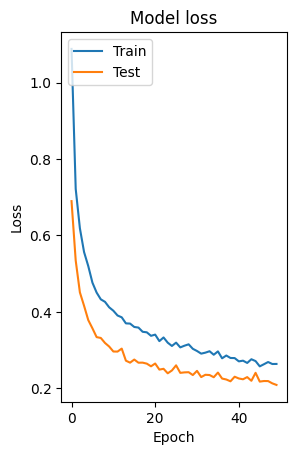

In [32]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


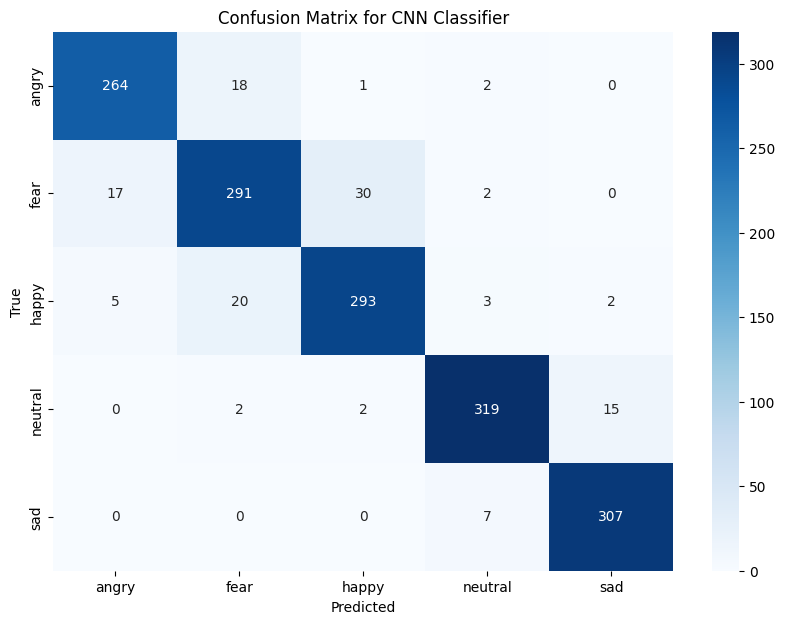

Classification Report:
              precision    recall  f1-score   support

       angry       0.92      0.93      0.92       285
        fear       0.88      0.86      0.87       340
       happy       0.90      0.91      0.90       323
     neutral       0.96      0.94      0.95       338
         sad       0.95      0.98      0.96       314

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [33]:
# Confusion matrix and classification report for the last fold
y_pred = model_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN Classifier')
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)